<a href="https://colab.research.google.com/github/mittalanuj2409/Major-Project/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [53]:
pip install mtcnn

In [54]:
from mtcnn.mtcnn import MTCNN

In [55]:
images=os.path.join("/content/drive/MyDrive/Cropped")
Y = pd.read_csv(os.path.join("/content/drive/MyDrive/Cropped_label.csv"))


In [56]:
print(len(images))
Y.head()

30


,x,y,diameter,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,6.90,0.5,NaN,NaN,NaN
1,0,6.85,0.5,NaN,NaN,NaN
2,0,6.80,0.5,NaN,NaN,NaN
3,0,6.75,0.5,NaN,NaN,NaN
4,0,6.70,0.5,NaN,NaN,NaN


In [57]:
Y = Y.drop(['Unnamed: 3',	'Unnamed: 4',	'Unnamed: 5'], axis = 1)

In [58]:
a = os.listdir(images)
a.sort()

In [59]:
a[100]

'101.png'

In [69]:
from numpy import asarray

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


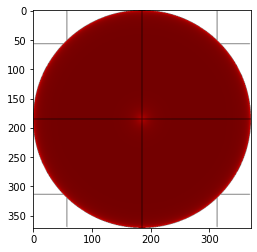

In [70]:
imgg=plt.imread(os.path.join(images,a[0]))
plt.imshow(imgg)

plt.show()


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, Y, test_size=0.20, random_state=42)

In [62]:
len(a)

106

In [63]:
y_test.head(10)

,x,y,diameter
100,0,4.30,3.0
10,0,6.40,0.5
4,0,6.70,0.5
81,0,5.61,3.0
97,0,4.60,3.0
65,0,5.30,2.0
30,0,6.30,1.0
33,0,6.00,1.0
93,0,5.00,3.0
11,0,6.40,1.5


In [64]:
X_test[0]

'101.png'

In [65]:
training = [] 

In [66]:
def createTrainingData():
  path = images
  for img in os.listdir(path):
      img_array = cv2.imread(img)
      new_array = cv2.resize(img_array, (30, 30))
      training.append([new_array])

In [67]:
createTrainingData()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [78]:
print(type(Y))

<class 'pandas.core.frame.DataFrame'>


In [80]:
train = pd.DataFrame(training)

In [81]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [82]:
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size = 0.2, random_state = 4)

In [83]:
batch_size = 16
nb_classes =4
nb_epochs = 5
img_rows, img_columns = 200, 200
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (X_test, y_test))

ValueError: ignored

In [88]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/content/drive/MyDrive/Cropped/001.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)



<class 'numpy.ndarray'>
(371, 371, 4)
<class 'PIL.Image.Image'>
RGBA
(371, 371)


In [89]:
print(data)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
